In [1]:
# !pip install lightgbm==3.3.5

Importing Required Libraries and loading dataset

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data/SBA_loans_project_2.zip")

In [3]:
df = data.drop(columns = ['index'])

In [4]:
df.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'LoanInd', 'MIS_Status'],
      dtype='object')

### Data Understanding
<ul><li>City: The city where the business is located.</li><li>State: The state where the business is located.</li><li>Zip: The ZIP code where the business is located.</li><li>Bank: The name of the bank that provided the loan.</li><li>BankState: The state where the bank is located.</li><li>NAICS: The North American Industry Classification System (NAICS) code for the industry of the business.</li><li>Term: The length of the loan in months.</li><li>NoEmp: The number of employees at the time the loan was approved.</li><li>NewExist: Indicates if the business was a new business at the time of the loan or an existing business.</li><li>CreateJob: The number of jobs created by the business as a result of the loan.</li><li>RetainedJob: The number of jobs retained by the business as a result of the loan.</li><li>FranchiseCode: Indicates if the business is a franchise, and if so, the franchise code.</li><li>UrbanRural: Indicates if the business is located in an urban or rural area.</li><li>RevLineCr: Indicates if the business has a revolving line of credit.</li><li>LowDoc: Indicates if the business applied for a Low Documentation Loan.</li><li>DisbursementGross: The amount of money disbursed to the business.</li><li>BalanceGross: The remaining balance of the loan at the time the data was collected.</li><li>GrAppv: The amount of money approved for the loan.</li><li>SBA_Appv: The amount of money guaranteed by the Small Business Administration (SBA).</li><li>MIS_Status: The loan status, which can be either "P I F" (Paid in Full) or "CHGOFF" (Charge Off).</li></ul>

Data Cleaning by handling null values, correcting inconsistencies, filtering irrelevant data.

In [5]:
df.isna().sum()

City                   26
State                  13
Zip                     0
Bank                 1347
BankState            1353
NAICS                   0
NoEmp                   0
NewExist              122
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4090
LowDoc               2291
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
LoanInd                 0
MIS_Status              0
dtype: int64

In [7]:
# Because the amount of missing value is so small comparing to the total amount of data.
# The row with missing value will be dropped. 
df=df.dropna()

In [8]:
# Recheck the missing value
df.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
LoanInd              0
MIS_Status           0
dtype: int64

In [9]:
# Show the data types
df.dtypes

City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross     object
BalanceGross          object
GrAppv                object
SBA_Appv              object
LoanInd                int64
MIS_Status             int64
dtype: object

In [10]:
# convert data types
df = df.convert_dtypes()

In [11]:
df.dtypes

City                 string
State                string
Zip                   Int64
Bank                 string
BankState            string
NAICS                 Int64
NoEmp                 Int64
NewExist              Int64
CreateJob             Int64
RetainedJob           Int64
FranchiseCode         Int64
UrbanRural            Int64
RevLineCr            string
LowDoc               string
DisbursementGross    string
BalanceGross         string
GrAppv               string
SBA_Appv             string
LoanInd               Int64
MIS_Status            Int64
dtype: object

In [12]:
# convert '$XXXX.XX' strings to float values
money_cols = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
df[money_cols] = df[money_cols].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))
df[money_cols] = df[money_cols].astype('float64')
df[money_cols] = df[money_cols].astype('int64')

In [13]:
df.MIS_Status.value_counts()

0    658827
1    140741
Name: MIS_Status, dtype: Int64

In [14]:
# Show the unique value of RevLineCr
df['RevLineCr'].value_counts()

N    374530
0    231623
Y    179685
T     13673
1        19
R        13
`        10
2         5
Q         1
5         1
C         1
-         1
7         1
.         1
A         1
4         1
,         1
3         1
Name: RevLineCr, dtype: Int64

In [15]:
# as we know that unique value of RevLineCr column is only Y and N, so we have to remove another unique value. 

values = ['0','T','1','R','`','2','C','3',',','7','A','5','.','4','-','Q']
df = df[df.RevLineCr.isin(values) == False]

In [16]:
# Show the unique value of LowDoc
df['LowDoc'].value_counts()

N    500376
Y     51539
0      1023
C       625
S       510
A        92
R        49
1         1
Name: LowDoc, dtype: Int64

In [17]:
# as we it is known that unique value of RevLineCr column is only Y and N, so we have to remove another unique value. 

values = ['0','C','S','A','R','1']
df = df[df.LowDoc.isin(values) == False]

In [18]:
df['NAICS'].value_counts()

0         138451
722110     12891
811111      8645
722211      8351
621210      8207
           ...  
212324         1
311311         1
325192         1
212210         1
212231         1
Name: NAICS, Length: 1301, dtype: Int64

### Encoding Categorical variables (Changing the category names of NAICS)

In [19]:
df['NAICS'] = df['NAICS'].astype('str').apply(lambda x: x[:2])
df['NAICS'] = df['NAICS'].map({
    '11': 'Ag_For_Fish_Hunt',
    '21': 'Min_Quar_Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans_Ware',
    '49': 'Trans_Ware',
    '51': 'Information',
    '52': 'Finance_Insurance',
    '53': 'RE_Rental_Lease',
    '54': 'Prof_Science_Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup_Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare_Social_assist',
    '71': 'Arts_Entertain_Rec',
    '72': 'Accom_Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})
df = df.dropna(subset=['NAICS'])

In [20]:
df['NAICS'].value_counts()

Retail_trade                73190
Construction                44550
Prof_Science_Tech           44505
Manufacturing               41207
Other_no_pub                40536
Wholesale_trade             31582
Healthcare_Social_assist    31280
Accom_Food_serv             31015
Admin_sup_Waste_Mgmt_Rem    19970
Trans_Ware                  13867
RE_Rental_Lease              8643
Arts_Entertain_Rec           8431
Ag_For_Fish_Hunt             6831
Information                  6626
Finance_Insurance            5682
Educational                  3654
Min_Quar_Oil_Gas_ext         1222
Utilities                     397
Public_Admin                  164
Mgmt_comp                     112
Name: NAICS, dtype: int64

### Feature engineerng

#### Loan Approval Ratio:
This feature could be calculated as the ratio of the SBA_Appv (the amount of money guaranteed by the Small Business Administration) to the GrAppv (the amount of money approved for the loan). This feature would indicate how much of the loan was guaranteed by the SBA compared to the total loan amount approved by the bank. A higher ratio could indicate a lower risk of default, as the loan has a larger government guarantee. On the other hand, a lower ratio could indicate a higher risk of default, as the loan has a smaller government guarantee.

In [21]:
df['Loan_Approval_Ratio'] = df['SBA_Appv'] / df['GrAppv']

#### Loan to Disbursement Ratio:
This feature could be calculated as the ratio of the DisbursementGross (the amount of money disbursed to the business) to the GrAppv (the amount of money approved for the loan). This feature would indicate how much of the approved loan amount was actually disbursed to the business. A higher ratio could indicate that the business is more likely to use the full loan amount to support their operations, which could suggest that they have a solid plan for how to use the funds to generate revenue and repay the loan. On the other hand, a lower ratio could indicate that the business is less likely to use the full loan amount, which could suggest that they are taking on less risk with the loan and may have less potential for growth and revenue generation.

In [22]:
df['Loan_Disbursement_Ratio'] = df['DisbursementGross'] / df['GrAppv']

#### log transformations
It can reduce the influence of extreme values and outliers in the data, which can have a disproportionate impact on statistical measures like the mean and standard deviation.

In [23]:
df['Log_DisbursementGross'] = np.log(df['DisbursementGross'])

In [24]:
df.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'LoanInd', 'MIS_Status', 'Loan_Approval_Ratio',
       'Loan_Disbursement_Ratio', 'Log_DisbursementGross'],
      dtype='object')

In [25]:
numerical_columns = [
'NoEmp',
'CreateJob',
'RetainedJob',                
'DisbursementGross',
'BalanceGross',
'GrAppv',
'SBA_Appv',
'LoanInd',
'Loan_Approval_Ratio',
'Loan_Disbursement_Ratio',
'Log_DisbursementGross'
]

categorical_columns = [
'City',
'State',
'Zip',
'Bank',
'BankState',
'FranchiseCode',
'NAICS',
'NewExist',
'UrbanRural',
'RevLineCr',
'LowDoc']

target_column = 'MIS_Status'

In [26]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,...,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status,Loan_Approval_Ratio,Loan_Disbursement_Ratio,Log_DisbursementGross
0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,Retail_trade,4,2,0,0,...,N,114577,0,114577,85933,1,0,0.750002,1.000000,11.649002
1,Kansas city,MO,64116,BANK OF HAYS,KS,Trans_Ware,14,1,0,14,...,N,25000,0,25000,12500,7,0,0.500000,1.000000,10.126631
4,EL PASO,TX,79925,WESTSTAR BANK,TX,Wholesale_trade,4,1,0,4,...,N,32000,0,32000,16000,9,0,0.500000,1.000000,10.373491
5,NASHUA,IA,50658,FIRST NATIONAL BANK,IA,Prof_Science_Tech,9,1,0,0,...,N,150000,0,150000,112500,7,0,0.750000,1.000000,11.918391
6,DOVER,DE,19904,WILMINGTON SAVINGS FUND SOCIET,DE,Construction,3,2,1,2,...,N,90317,0,35000,17500,7,0,0.500000,2.580486,11.411081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807438,TERRE HAUTE,IN,47802,FIRST FINAN BANK NATL ASSOC,IN,Retail_trade,2,1,0,0,...,N,163700,0,163700,103131,5,0,0.630000,1.000000,12.005791
807439,CHICAGO,IL,60602,NORTH COMMUNITY BANK,IL,Prof_Science_Tech,4,1,0,0,...,Y,25000,0,25000,22500,7,0,0.900000,1.000000,10.126631
807440,NEW HOPE,MN,55422,STATE BANK OF DELANO,MN,Other_no_pub,1,1,0,0,...,Y,91000,0,91000,81900,10,0,0.900000,1.000000,11.418615
807446,ARLINGTON,TX,76016,JPMORGAN CHASE BANK NATL ASSOC,IL,Admin_sup_Waste_Mgmt_Rem,1,1,0,1,...,N,129886,0,40300,20150,1,0,0.500000,3.222978,11.774412


In [27]:
def cleaning(df,train=True):
    try:
        df = df.drop(columns=['index'],axis=1)
    except:
        pass
    
    # drop null
    df = df.dropna()
    
    # clean money columns
    money_cols = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
    df[money_cols] = df[money_cols].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))
    df[money_cols] = df[money_cols].astype('float64')
    df[money_cols] = df[money_cols].astype('int64')
    
    # clean MIS_Status
#     df['MIS_Status'] = df['MIS_Status'].apply(lambda x: 1 if x == "CHGOFF" else 0)
    
    # clean RevLineCr 
    values = ['0','T','1','R','`','2','C','3',',','7','A','5','.','4','-','Q']
    df = df[df.RevLineCr.isin(values) == False]
    
    # clean LowDoc
    values = ['0','C','S','A','R','1']
    df = df[df.LowDoc.isin(values) == False]
    
    # clean NAICS
    df['NAICS'] = df['NAICS'].astype('str').apply(lambda x: x[:2])
    df['NAICS'] = df['NAICS'].map({
        '11': 'Ag_For_Fish_Hunt',
        '21': 'Min_Quar_Oil_Gas_ext',
        '22': 'Utilities',
        '23': 'Construction',
        '31': 'Manufacturing',
        '32': 'Manufacturing',
        '33': 'Manufacturing',
        '42': 'Wholesale_trade',
        '44': 'Retail_trade',
        '45': 'Retail_trade',
        '48': 'Trans_Ware',
        '49': 'Trans_Ware',
        '51': 'Information',
        '52': 'Finance_Insurance',
        '53': 'RE_Rental_Lease',
        '54': 'Prof_Science_Tech',
        '55': 'Mgmt_comp',
        '56': 'Admin_sup_Waste_Mgmt_Rem',
        '61': 'Educational',
        '62': 'Healthcare_Social_assist',
        '71': 'Arts_Entertain_Rec',
        '72': 'Accom_Food_serv',
        '81': 'Other_no_pub',
        '92': 'Public_Admin'
    })
    df = df.dropna(subset=['NAICS'])
    
    df['Loan_Approval_Ratio'] = df['SBA_Appv'] / df['GrAppv']
    df['Loan_Disbursement_Ratio'] = df['DisbursementGross'] / df['GrAppv']
    df['Log_DisbursementGross'] = np.log(df['DisbursementGross'])
    
    numerical_columns = [
    # 'Term',
    'NoEmp',
    'CreateJob',
    'RetainedJob',                
    'DisbursementGross',
    'BalanceGross',
    'GrAppv',
    'SBA_Appv',
    'LoanInd',
    'Loan_Approval_Ratio',
    'Loan_Disbursement_Ratio',
    'Log_DisbursementGross']

    categorical_columns = [
    'City',
    'State',
    'Zip',
    'Bank',
    'BankState',
    'FranchiseCode',
    'NAICS',
    'NewExist',
    'UrbanRural',
    'RevLineCr',
    'LowDoc']

    target_column = 'MIS_Status'
    
    X = df[categorical_columns+numerical_columns]
    y = df[target_column]

    data = (X,y)
    features = (categorical_columns,numerical_columns,target_column)

    return (data, features)

        

Splitting dataset to Train/Test/Validation.

In [28]:
X,y = cleaning(data)[0]
categorical_columns,numerical_columns,target_column = cleaning(data)[1]

In [29]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

# Split train data into train and validation sets using train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)


In [31]:
train_data = X_train_full.copy()
train_data.loc[:,target_column] = y_train
train_data.to_csv('train_data.csv',index=False)

In [32]:
test_data = X_val.copy()
test_data.loc[:,target_column] = y_val
test_data.to_csv('val_data.csv',index=False)

In [33]:
test_data = X_test.copy()
test_data.loc[:,target_column] = y_test
test_data.to_csv('test_data.csv',index=False)

Load the saved data

In [34]:
import pandas as pd
import numpy as np

In [35]:
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

In [36]:
X_train,y_train = cleaning(train_data)[0]
categorical_columns,numerical_columns,target_column = cleaning(train_data)[1]

In [37]:
X_val,y_val = cleaning(val_data)[0]
X_test,y_test = cleaning(test_data)[0]

In [38]:
X_train.shape,X_val.shape,X_test.shape

((264675, 22), (66265, 22), (82524, 22))

Encode categorical variables

In [39]:
categories_less_than_10 = []
categories_more_than_10 = []
for c in list(train_data[categorical_columns]):
    size = len(train_data[c].unique())
    print(f'No of Unique Categories in {c} : {size} | {train_data[c].dtype}')
    if size <= 10:
        categories_less_than_10.append(c)
    else:
        categories_more_than_10.append(c)
poly_numerical_features = [
    'DisbursementGross',
    'BalanceGross',
    'GrAppv',
    'SBA_Appv']    

No of Unique Categories in City : 28715 | object
No of Unique Categories in State : 52 | object
No of Unique Categories in Zip : 30965 | int64
No of Unique Categories in Bank : 5527 | object
No of Unique Categories in BankState : 57 | object
No of Unique Categories in FranchiseCode : 2497 | int64
No of Unique Categories in NAICS : 1303 | int64
No of Unique Categories in NewExist : 4 | float64
No of Unique Categories in UrbanRural : 3 | int64
No of Unique Categories in RevLineCr : 15 | object
No of Unique Categories in LowDoc : 9 | object


In [40]:
from category_encoders import WOEEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [41]:
one_hot_encoder = OneHotEncoder(cols=categories_less_than_10)
woe_encoder = WOEEncoder(cols=categories_more_than_10)
standard_scaler = StandardScaler()
poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)

X_train_encoded = one_hot_encoder.fit_transform(X_train,y_train)
X_train_encoded = woe_encoder.fit_transform(X_train_encoded,y_train)
X_train_encoded[numerical_columns] = standard_scaler.fit_transform(X_train_encoded[numerical_columns])

poly_df = poly.fit_transform(X_train_encoded[poly_numerical_features])[:,len(poly_numerical_features):]
poly_features = poly.get_feature_names_out(input_features=poly_numerical_features)[len(poly_numerical_features):]
X_train_encoded[poly_features] = poly_df

X_train_encoded[target_column] = y_train

X_train_encoded.to_csv('X_train_encoded.csv',index=False)

In [42]:
X_val_encoded = one_hot_encoder.transform(X_val,y_val)
X_val_encoded = woe_encoder.transform(X_val_encoded,y_val)
X_val_encoded[numerical_columns] = standard_scaler.transform(X_val_encoded[numerical_columns])

poly_df= poly.fit_transform(X_val_encoded[poly_numerical_features])[:,len(poly_numerical_features):]
poly_features = poly.get_feature_names_out(input_features=poly_numerical_features)[len(poly_numerical_features):]
X_val_encoded[poly_features] = poly_df

X_val_encoded[target_column] = y_val

X_val_encoded.to_csv('X_val_encoded.csv',index=False)

In [43]:
X_test_encoded = one_hot_encoder.transform(X_test,y_test)
X_test_encoded = woe_encoder.transform(X_test_encoded,y_test)
X_test_encoded[numerical_columns] = standard_scaler.transform(X_test_encoded[numerical_columns])

poly_df= poly.fit_transform(X_test_encoded[poly_numerical_features])[:,len(poly_numerical_features):]
poly_features = poly.get_feature_names_out(input_features=poly_numerical_features)[len(poly_numerical_features):]
X_test_encoded[poly_features] = poly_df

X_test_encoded[target_column] = y_test

X_test_encoded.to_csv('X_test_encoded.csv',index=False)

In [44]:
X_train_encoded.shape,X_val_encoded.shape,X_test_encoded.shape

((264675, 38), (66265, 38), (82524, 38))

Training and Tuning ML models

In [45]:
X_train_encoded.MIS_Status.value_counts()

0.0    207903
1.0     56772
Name: MIS_Status, dtype: int64

In [46]:
X_train_encoded = pd.read_csv('X_train_encoded.csv')
X_val_encoded = pd.read_csv('X_val_encoded.csv')

In [47]:
X_train = X_train_encoded.drop(columns = 'MIS_Status',axis=1)
y_train = X_train_encoded['MIS_Status']

In [48]:
X_val = X_val_encoded.drop(columns = 'MIS_Status',axis=1)
y_val = X_val_encoded['MIS_Status']

In [49]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import f1_score,accuracy_score,auc,roc_auc_score
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import numpy as np

### Light GBM

In [50]:
model = lgb.LGBMClassifier(
    learning_rate=0.1,
    n_estimators=100,
    objective='binary',
    random_state=42
)

In [51]:
model.fit(X_train, y_train)

LGBMClassifier(objective='binary', random_state=42)

In [52]:
y_pred_proba = model.predict_proba(X_val)
auc = roc_auc_score(y_val, y_pred_proba[:, 1])
print("AUC Score: %.2f%%" % (auc * 100.0))

AUC Score: 81.57%


In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.5], 
    'n_estimators': [100, 200, 300, 400, 500],
    'num_leaves': [10, 20, 30, 40, 50]
}

model = lgb.LGBMClassifier(objective='binary', random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

fit_params = {
    'eval_set': [(X_val, y_val)],
    'early_stopping_rounds': 10,
    'verbose': False
}

grid_search.fit(X_train, y_train, **fit_params)


print("Best Parameters",grid_search.best_params_)
print("Best AUC",grid_search.best_score_)

Best Parameters {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 50}
Best AUC 0.8408312080853877


###  H2O


In [55]:
import h2o
try:
    h2o.cluster().shutdown()
except:
    pass
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from C:\Users\16826\AppData\Local\Programs\Python\Python38\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\16826\AppData\Local\Temp\tmpssydt16d
  JVM stdout: C:\Users\16826\AppData\Local\Temp\tmpssydt16d\h2o_16826_started_from_python.out
  JVM stderr: C:\Users\16826\AppData\Local\Temp\tmpssydt16d\h2o_16826_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,"1 year, 4 months and 10 days !!!"
H2O_cluster_name:,H2O_from_python_16826_23ki0k
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.934 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [56]:
train = h2o.import_file('X_train_encoded.csv')
val = h2o.import_file('X_val_encoded.csv')
test = h2o.import_file('X_test_encoded.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [57]:
features = train.col_names
response = 'MIS_Status'
features.remove(response)
cat_columns = []
train[cat_columns+[response]] = train[cat_columns+[response]].asfactor()
val[cat_columns+[response]] = val[cat_columns+[response]].asfactor()
test[cat_columns+[response]] = test[cat_columns+[response]].asfactor()

#### H2O on encoded data

In [58]:
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [59]:


model_params = {
    'nfolds': 5,
    'ntrees': 500,
    'stopping_rounds': 5,
    'stopping_metric': 'AUCPR',
    'seed': 1234,
    'keep_cross_validation_predictions': False
}



gbm_model = H2OGradientBoostingEstimator(**model_params)
gbm_model.train(x=features, y=response, training_frame=train, validation_frame=val)

perf = gbm_model.model_performance(test_data=test)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [60]:
print("AUC on test dataset: ", perf.auc())

AUC on test dataset:  0.8190229665989628


### Tune H2o

In [61]:
gbm_params = {
                'learn_rate': [0.1,0.3,0.5], 
                'max_depth': [ 5,7,9],
                'sample_rate': [0.8, 1.0],
                 'ntrees': [1000,1200,1500]}
gbm = H2OGradientBoostingEstimator(seed=123)


grid = H2OGridSearch(model=gbm, grid_id='gbm_grid1',hyper_params=gbm_params)
grid.train(x=features, y=response, training_frame=train, validation_frame=val,stopping_rounds=10, stopping_tolerance=1e-3, seed=1)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,learn_rate,max_depth,ntrees,sample_rate,model_ids,logloss
,0.1,9.0,1000.0,1.0,gbm_grid1_model_34,0.4018943
,0.1,9.0,1200.0,1.0,gbm_grid1_model_43,0.4018943
,0.1,9.0,1500.0,1.0,gbm_grid1_model_52,0.4018943
,0.1,9.0,1200.0,0.8,gbm_grid1_model_16,0.4022400
,0.1,9.0,1500.0,0.8,gbm_grid1_model_25,0.4022400
,0.1,9.0,1000.0,0.8,gbm_grid1_model_7,0.4022400
,0.1,7.0,1200.0,0.8,gbm_grid1_model_13,0.4024424
,0.1,7.0,1500.0,0.8,gbm_grid1_model_22,0.4024424
,0.1,7.0,1000.0,0.8,gbm_grid1_model_4,0.4024424
,0.1,7.0,1000.0,1.0,gbm_grid1_model_31,0.4025505


In [62]:
gbm_grid = grid.get_grid(sort_by='auc', decreasing=True)

In [63]:
best_gbm = gbm_grid.models[0]

In [64]:
best_gbm.auc(test)

0.8979685852328444

In [65]:
h2o.save_grid(grid_directory='./h2o_model_grids',grid_id='gbm_grid1')

'./h2o_model_grids/gbm_grid1'

Final metrics using Test (hold-out) dataset:


Classification: AUC

In [66]:
print("AUC on test dataset: ", round(best_gbm.auc(test)*100,2))

AUC on test dataset:  89.8


Confusion matrix for best F1

In [67]:
print("F1 on test dataset: ", round(best_gbm.F1()[0][1]*100),2)

F1 on test dataset:  67 2


In [68]:
best_threshold = best_gbm.find_threshold_by_max_metric(metric='F1')
print("Threshold for Best F1: ",round(best_threshold,2))

Threshold for Best F1:  0.32


In [69]:
best_gbm.confusion_matrix()

,0,1,Error,Rate
0,183205.0,24698.0,0.1188,(24698.0/207903.0)
1,15943.0,40829.0,0.2808,(15943.0/56772.0)
Total,199148.0,65527.0,0.1536,(40641.0/264675.0)


In [70]:
# Saving Artifacts for Trained models, Encoders and Scoring
import pickle
#import os
#artifacts_folder=os.makedirs("artifacts", exist_ok="True")
artifacts_dict = {
        "ohe_encoder": one_hot_encoder,
        "woe_encoder": woe_encoder,
        "numerical_encoder": standard_scaler,
        "poly_features_encoder" : poly,
        "poly_numerical_features" :poly_numerical_features,
        "ohe_columns": categories_less_than_10,
        "woe_columns" : categories_more_than_10,
        "numerical_columns" : numerical_columns,
        "target_column" : "MIS_Status",
    }
artifacts_dict_file = open("./artifacts/artifacts_dict_file.pkl", "wb")
pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)

artifacts_dict_file.close()    

Interpreting final trained model using Test dataset:

In [71]:
grid = h2o.load_grid('./h2o_model_grids/gbm_grid1')
best_gbm= gbm_grid.models[0]

Global feature importance using both Shapley values and permutation feature importance


In [72]:
perm_imp = best_gbm.permutation_importance(frame=test,use_pandas=True, metric="PR_AUC")
perm_imp

,Relative Importance,Scaled Importance,Percentage
Variable,,,
Bank,0.158849,1.000000,0.297926
Loan_Disbursement_Ratio,0.061909,0.389736,0.116113
RevLineCr,0.056987,0.358751,0.106881
Zip,0.056201,0.353803,0.105407
FranchiseCode,0.052576,0.330979,0.098607
BankState,0.049916,0.314237,0.093619
Log_DisbursementGross,0.016526,0.104033,0.030994
UrbanRural_1,0.014925,0.093955,0.027992
City,0.013193,0.083052,0.024743


From the results, we can see that the "Bank" feature has the highest importance, with a scaled importance of 1.0, followed by "RevLineCr", "FranchiseCode", "Loan_Disbursement_Ratio", and "Zip". The least important features are "Log_DisbursementGross", "NAICS", and "Loan_Approval_Ratio".

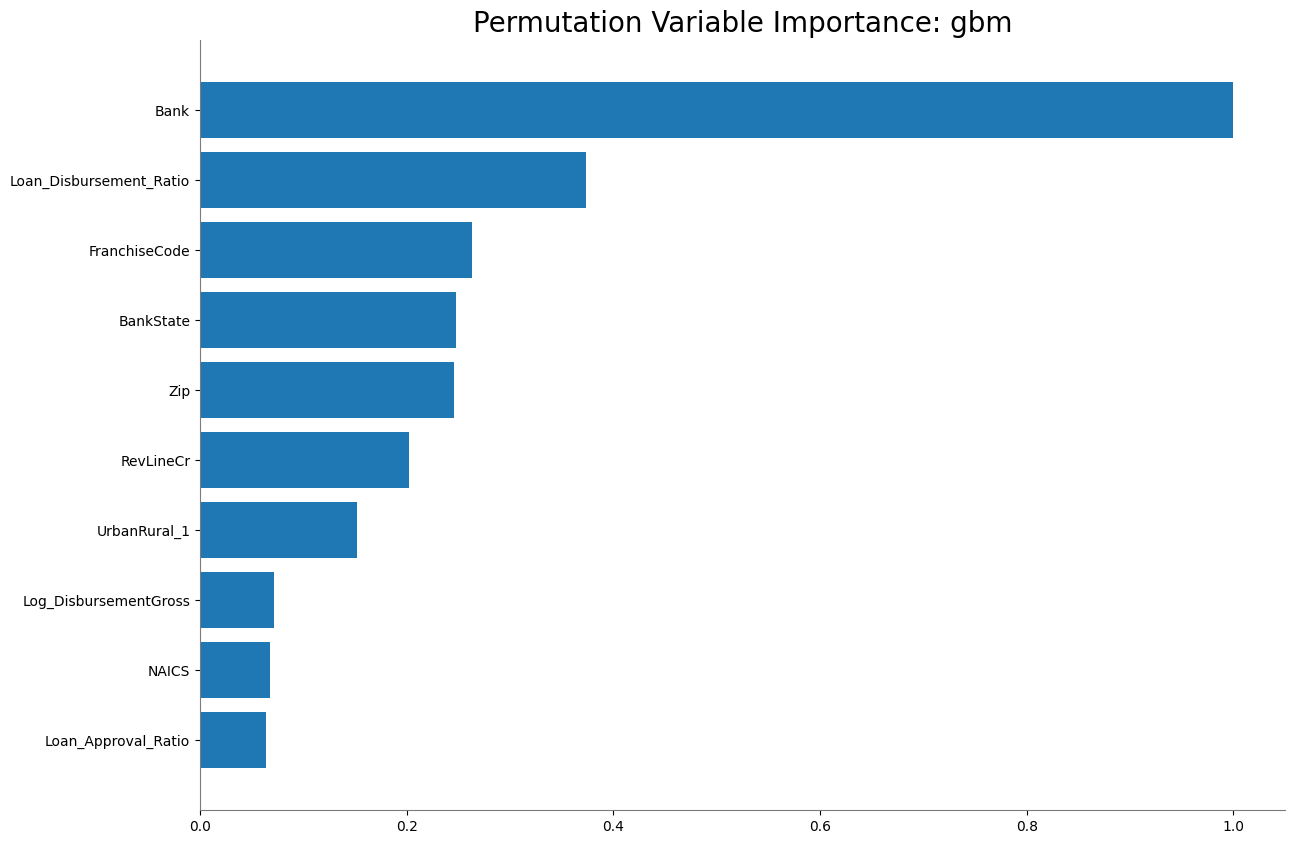

Variable,Relative Importance,Scaled Importance,Percentage
Bank,0.1072768,1.0,0.3448299
Loan_Disbursement_Ratio,0.0400537,0.3733682,0.1287485
FranchiseCode,0.0282247,0.2631018,0.0907254
BankState,0.0265845,0.2478125,0.0854532
Zip,0.0264099,0.2461847,0.0848919
RevLineCr,0.0216606,0.2019131,0.0696257
UrbanRural_1,0.0162647,0.1516146,0.0522813
Log_DisbursementGross,0.0076646,0.0714465,0.0246369
NAICS,0.0072685,0.0677550,0.0233639
Loan_Approval_Ratio,0.0069008,0.0643272,0.0221819


In [73]:
best_gbm.permutation_importance_plot(test)

From the results, we can see that the "Bank" feature has the highest importance, followed by "Loan_Disbursement_Ratio" ,"FranchiseCode", and "Zip".

Summary plot with Shapley values


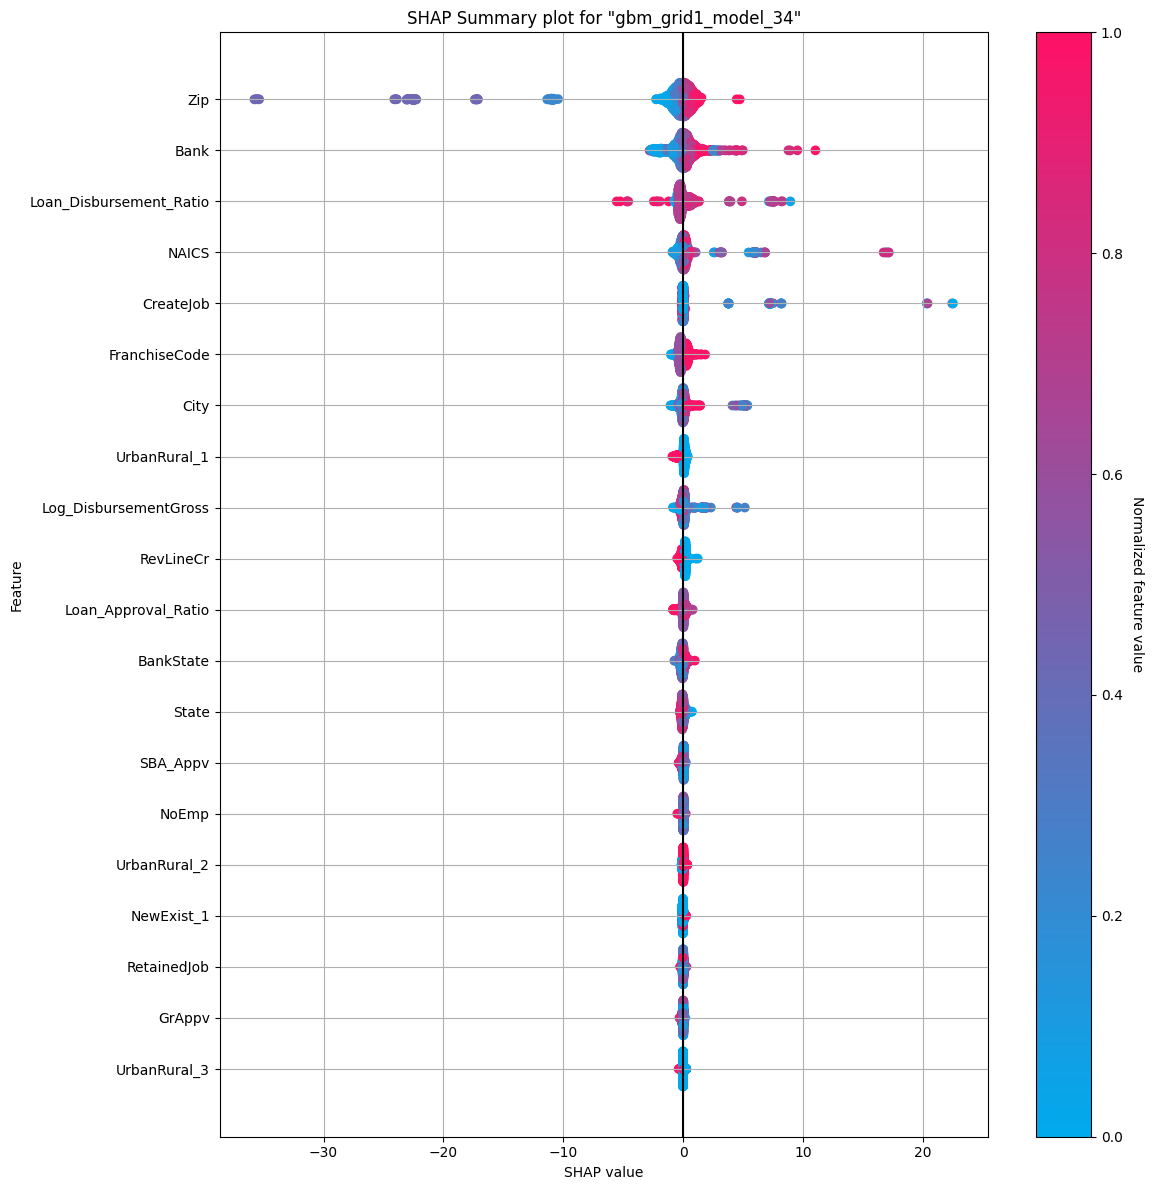

In [74]:
best_gbm.shap_summary_plot(test)

From the results, we can see that the "Zip" feature has the highest importance, followed by  "Bank" and then "Loan_Disbursement_Ratio".

Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:


In [75]:
best_threshold = best_gbm.find_threshold_by_max_metric(metric='F1')
print("Threshold for Best F1: ",round(best_threshold,2))

probabilities = best_gbm.predict(test)

Threshold for Best F1:  0.32
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [76]:
red_np = np.where(probabilities["p0"] > best_threshold, 0, 1)

In [77]:
output = test.as_data_frame()
output ['actual_label'] = test['MIS_Status'].as_data_frame()
output['predicted_label'] = (probabilities['p0'] < best_threshold).as_data_frame()
output['predicted_probability'] = probabilities['p0'].as_data_frame()
output = output.sort_values('predicted_probability',ascending=False)

In [78]:
output

,City,State,Zip,Bank,BankState,FranchiseCode,NAICS,NewExist_1,NewExist_2,NewExist_3,...,BalanceGross SBA_Appv,GrAppv SBA_Appv,DisbursementGross BalanceGross GrAppv,DisbursementGross BalanceGross SBA_Appv,DisbursementGross GrAppv SBA_Appv,BalanceGross GrAppv SBA_Appv,MIS_Status,actual_label,predicted_label,predicted_probability
72394,0.713489,0.281735,-2.390877,-5.447234,0.383199,-0.547408,-0.352792,0,1,0,...,-0.004988,4.077445,-0.006093,-0.008024,6.558758,-0.008777,0,0,0,0.999092
80436,0.087599,0.281735,-1.266947,-4.395729,0.383199,-0.547408,0.186703,0,1,0,...,-0.002356,0.827668,-0.001066,-0.001542,0.541805,-0.001782,0,0,0,0.999089
36742,-0.115199,-0.315573,-1.505358,-3.777171,-1.142633,-0.547408,0.183499,0,0,1,...,-0.001000,0.111097,-0.000084,-0.000163,0.018118,-0.000239,0,0,0,0.999048
55284,0.713489,0.281735,-1.920873,-5.447234,0.383199,-0.547408,0.183499,0,1,0,...,-0.000236,-0.005687,-0.000024,0.000050,0.001205,0.000012,0,0,0,0.999046
6829,-0.319850,-0.284065,-2.103195,-2.103195,-0.634781,-0.547408,-0.822224,0,1,0,...,-0.000317,-0.003117,-0.000004,0.000027,0.000263,0.000007,0,0,0,0.999019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10921,2.838448,0.042298,0.142232,-0.419649,-0.005733,1.010321,0.572721,0,1,0,...,0.001055,0.243085,-0.000429,-0.000424,-0.097717,-0.000523,1,1,1,0.010171
37625,2.396615,0.281735,2.396615,1.159072,1.108251,0.604971,0.130594,1,0,0,...,0.001055,0.243085,-0.000572,-0.000565,-0.130288,-0.000523,1,1,1,0.008229
43567,2.684297,0.040033,2.684297,2.293768,0.383199,0.604971,0.130594,0,1,0,...,0.001116,0.292022,-0.000727,-0.000669,-0.175123,-0.000629,1,1,1,0.005357
51432,2.396615,-0.496751,2.396615,2.079642,0.383199,0.604971,0.183499,0,1,0,...,0.001138,0.302667,-0.000750,-0.000693,-0.184262,-0.000652,0,0,1,0.005256


##### Label 0 is correctly identified


In [79]:
label_0_identified_correctly = output[(output['MIS_Status'] == 0 ) & (output['predicted_label'] == 0)].iloc[0:2,:-3]
label_0_identified_correctly = h2o.H2OFrame(label_0_identified_correctly)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

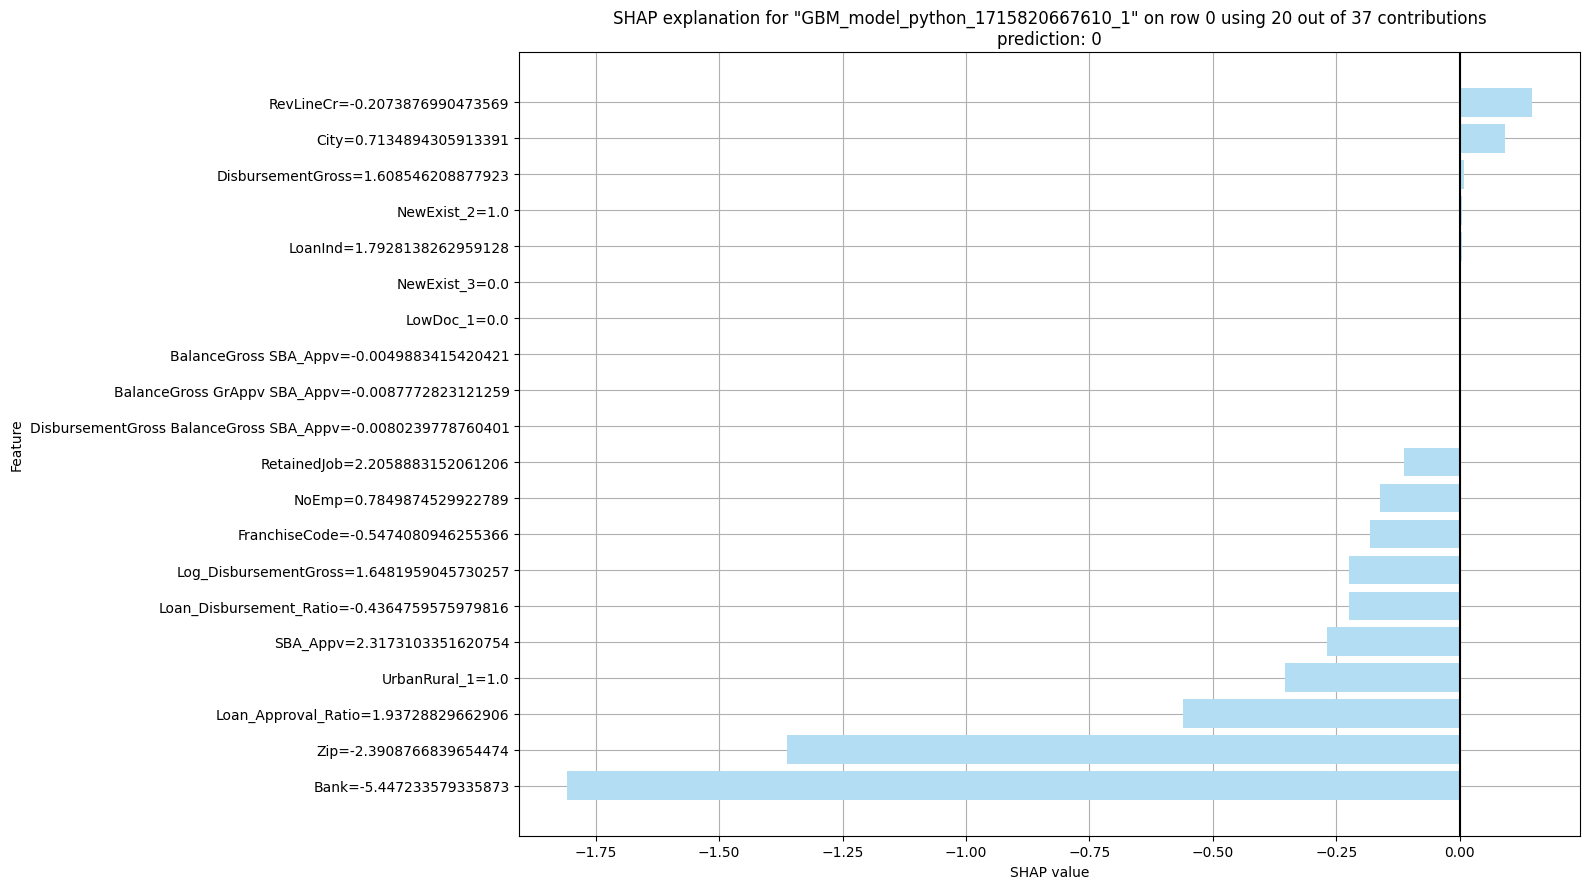

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [80]:
row_index = 0
gbm_model.explain_row(label_0_identified_correctly, row_index =row_index,include_explanations='shap_explain_row')

###### The most influential feature on the response variable is Bank , which has a negative impact followed by Zip with negative effect

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

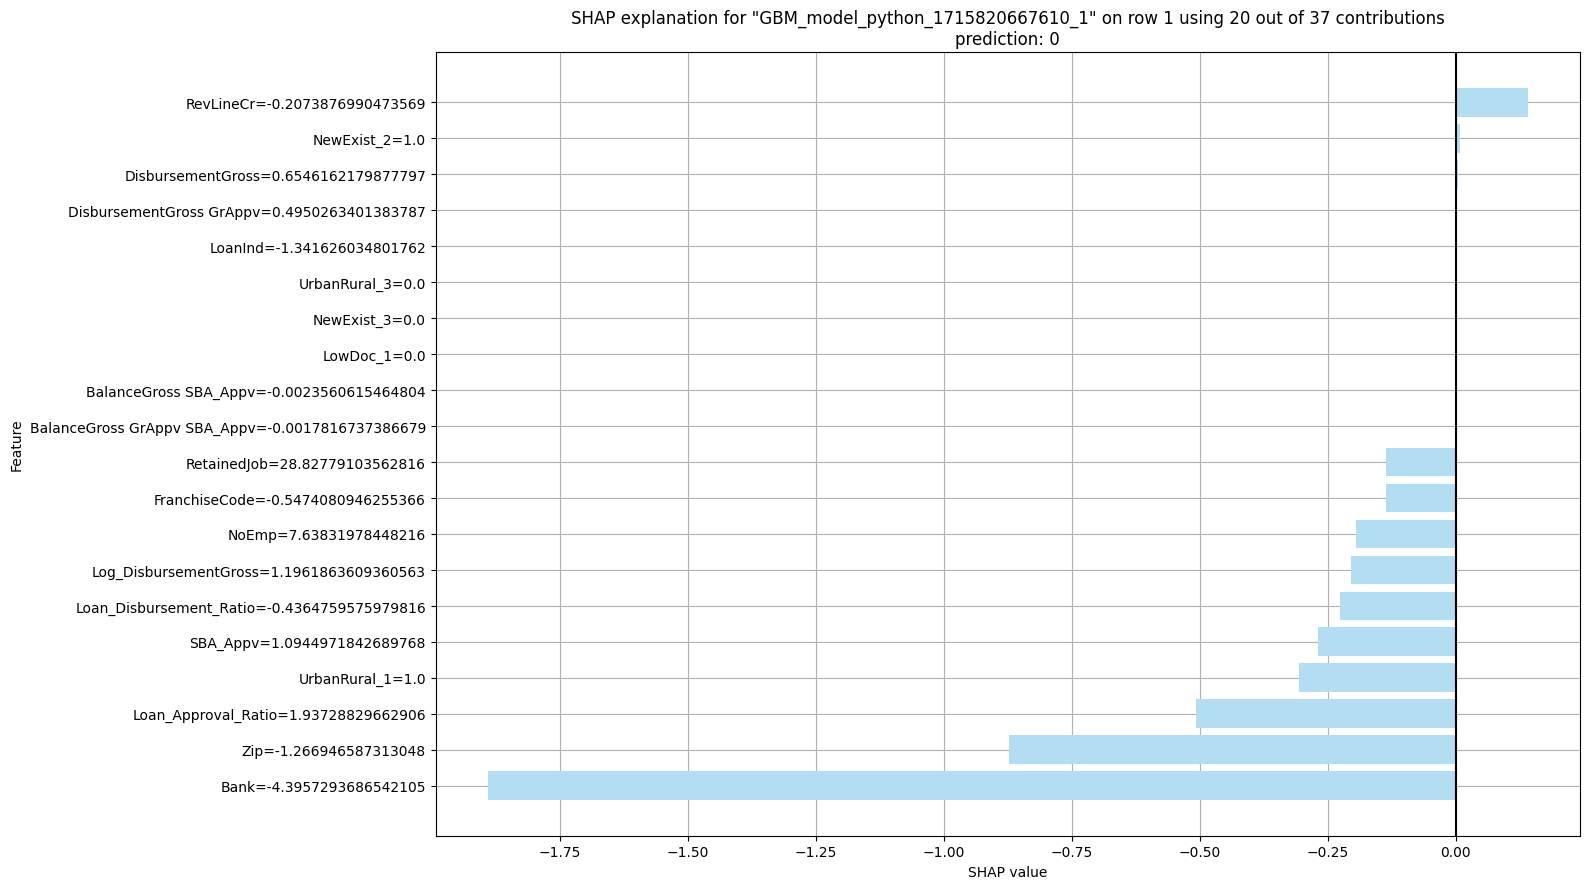

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [81]:
row_index = 1
gbm_model.explain_row(label_0_identified_correctly, row_index =row_index,include_explanations='shap_explain_row')

###### The most influential feature on the response variable is Bank , which has a negative impact followed byZip with negative effect

##### Label 0 is identified as 1


In [82]:
label_0_identified_as_1 = output[(output['MIS_Status'] == 0 ) & (output['predicted_label'] == 1)].iloc[0:2,:-3]
label_0_identified_as_1 = h2o.H2OFrame(label_0_identified_as_1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

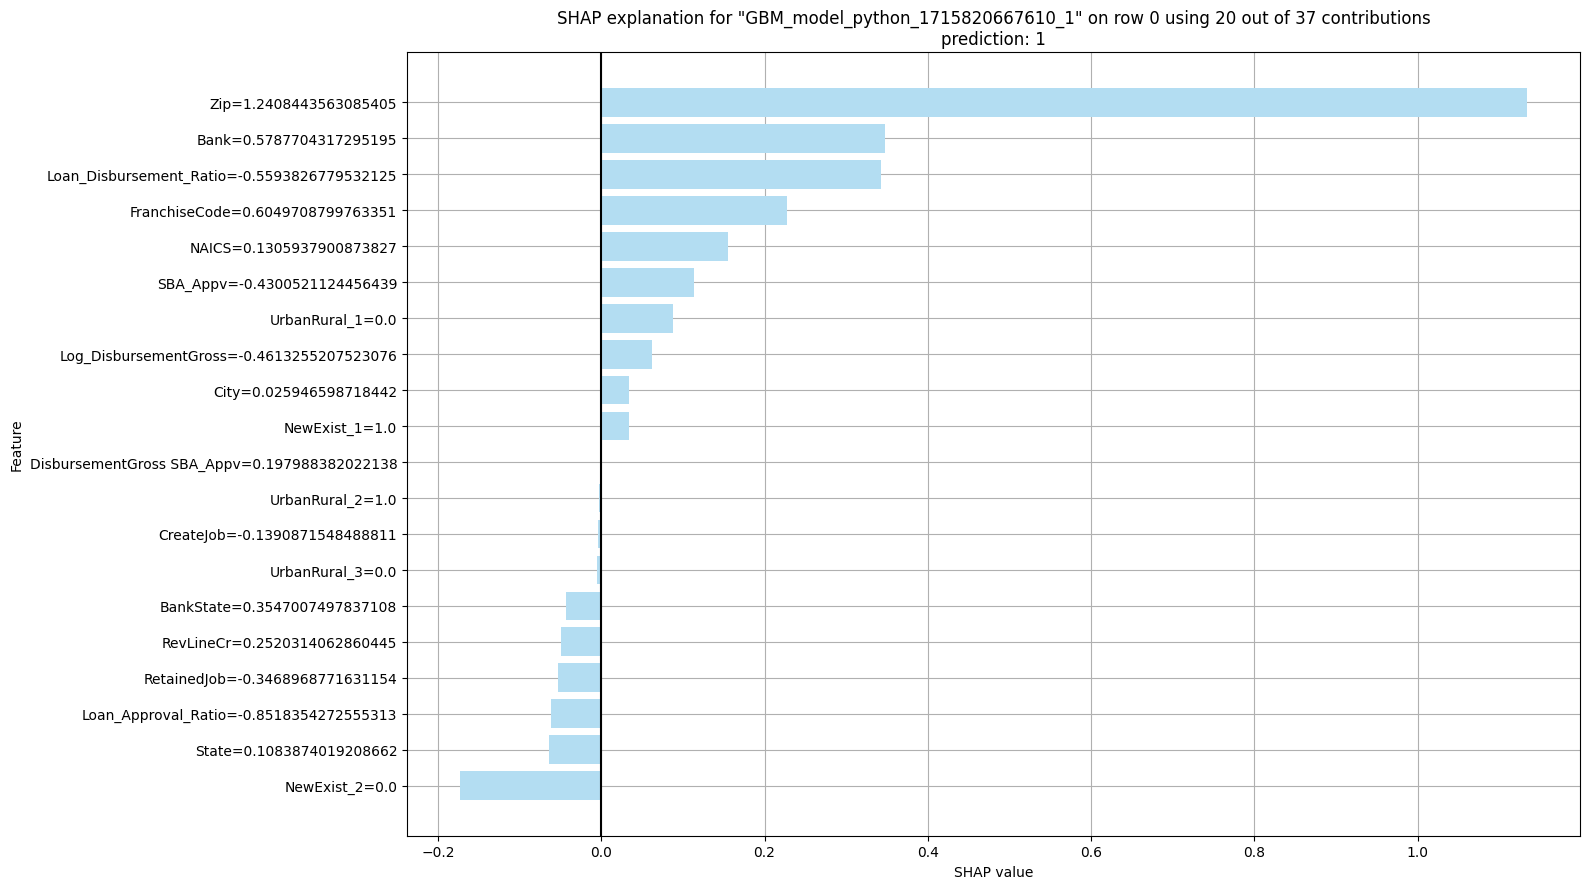

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [83]:
row_index = 0
gbm_model.explain_row(label_0_identified_as_1, row_index =row_index,include_explanations='shap_explain_row')

###### The most influential feature on the response variable is Zip , which has a positive impact followed by Loan Disbursement Ratio with positive effect

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

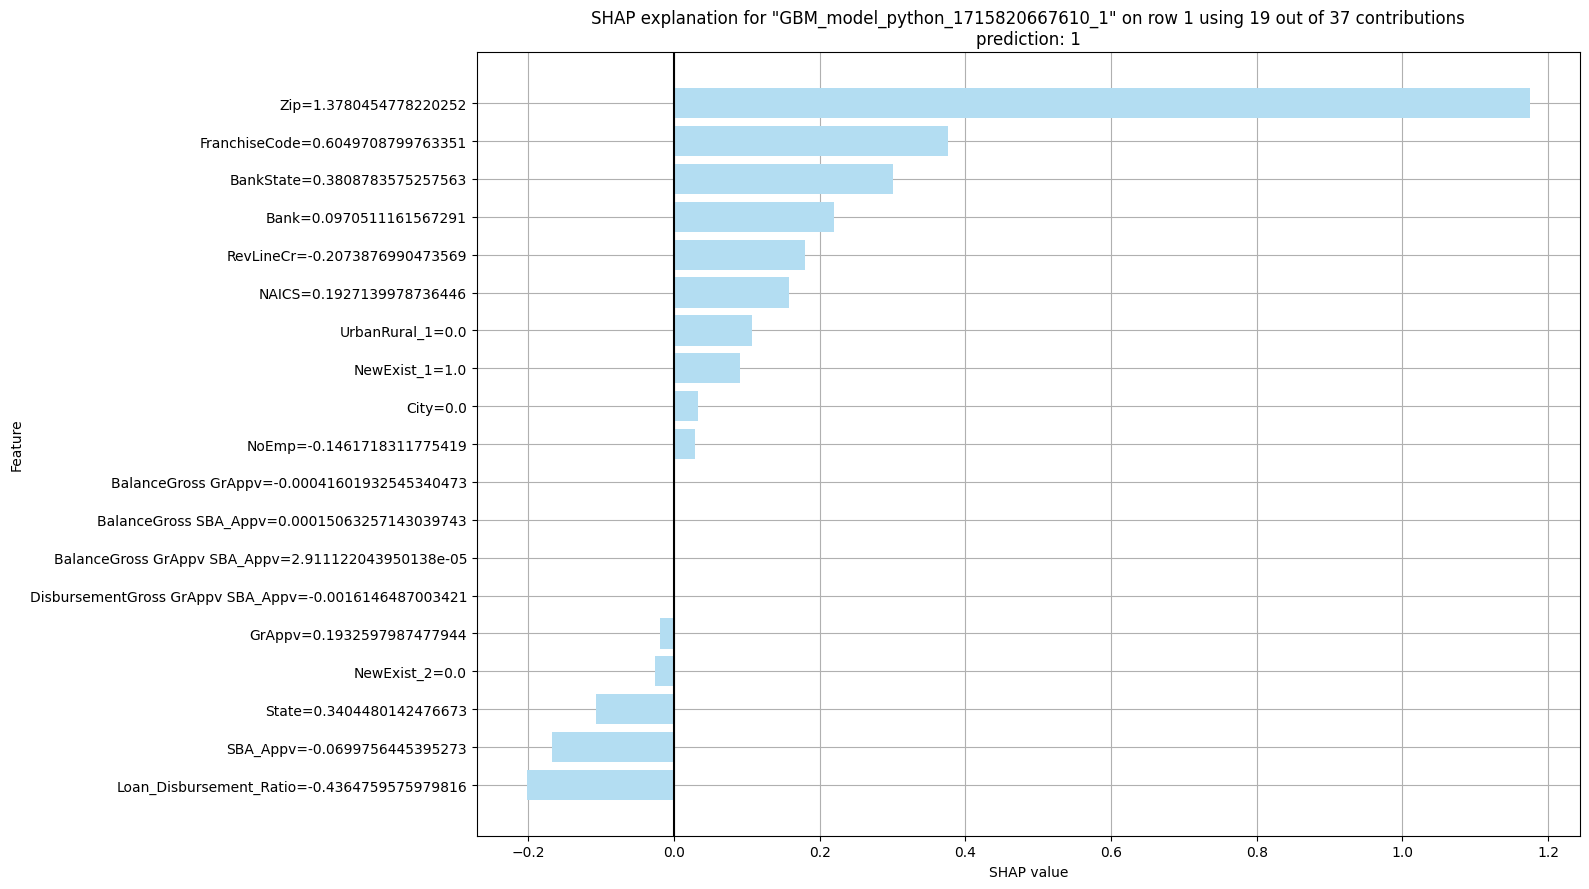

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [84]:
row_index = 1
gbm_model.explain_row(label_0_identified_as_1, row_index =row_index,include_explanations='shap_explain_row')

###### The most influential feature on the response variable is Zip , which has a positive impact followed by Franchise Code with positive effect

##### Label 1 is correctly identified


In [85]:
label_1_identified_correctly = output[(output['MIS_Status'] == 1 ) & (output['predicted_label'] == 1)].iloc[0:2,:-3]
label_1_identified_correctly = h2o.H2OFrame(label_1_identified_correctly)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

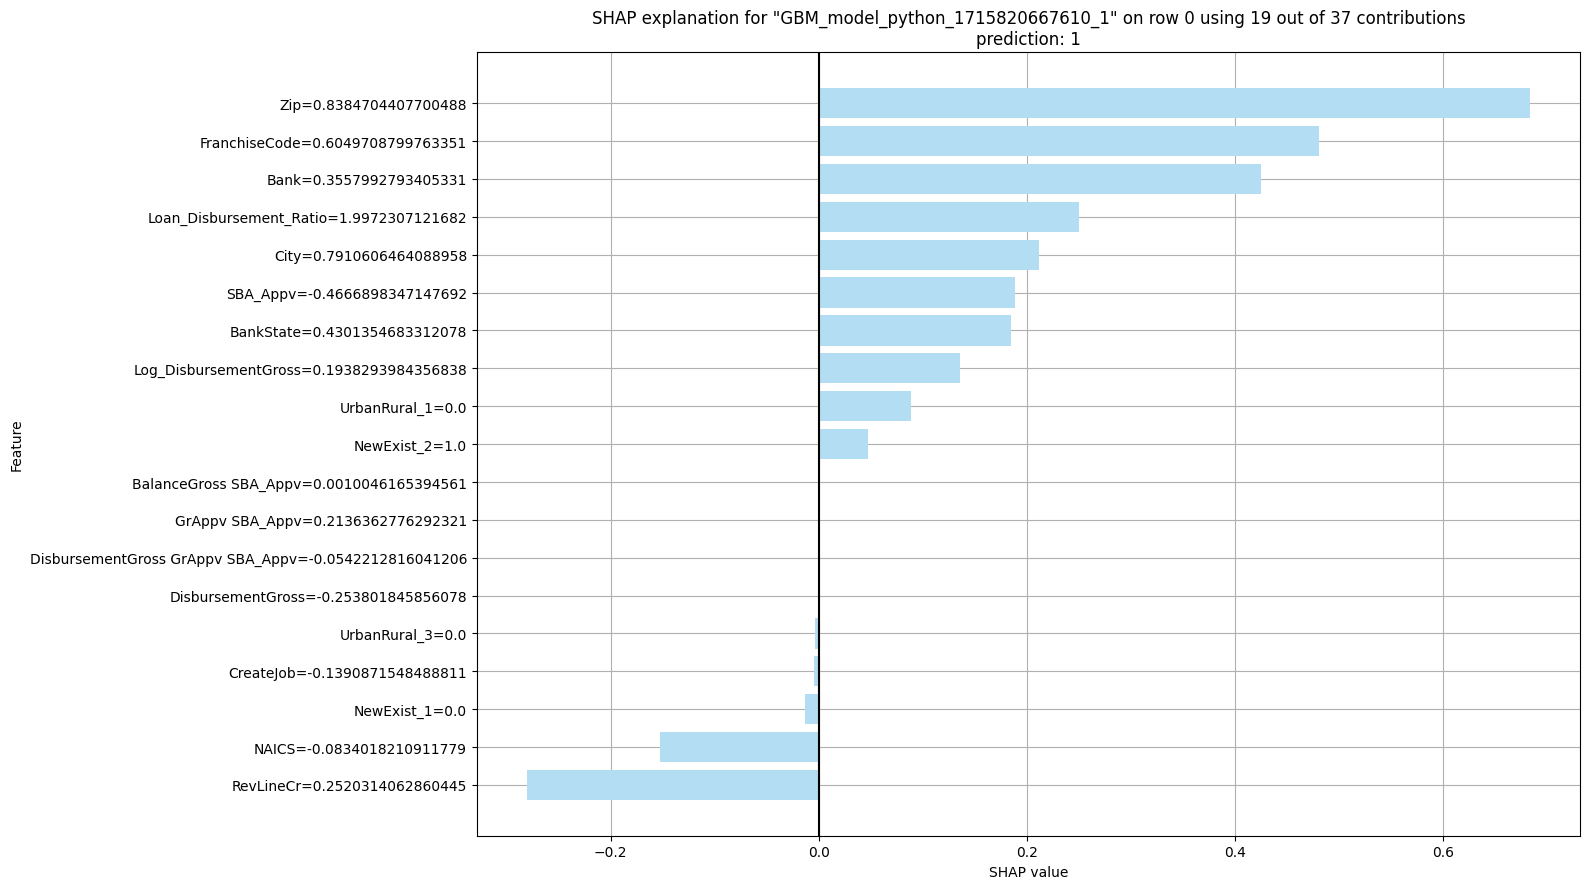

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [86]:
row_index = 0
gbm_model.explain_row(label_1_identified_correctly, row_index =row_index,include_explanations='shap_explain_row')

###### The most influential feature on the response variable is Zip , which has a positive impact followed by Franchise Code with positive effect

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

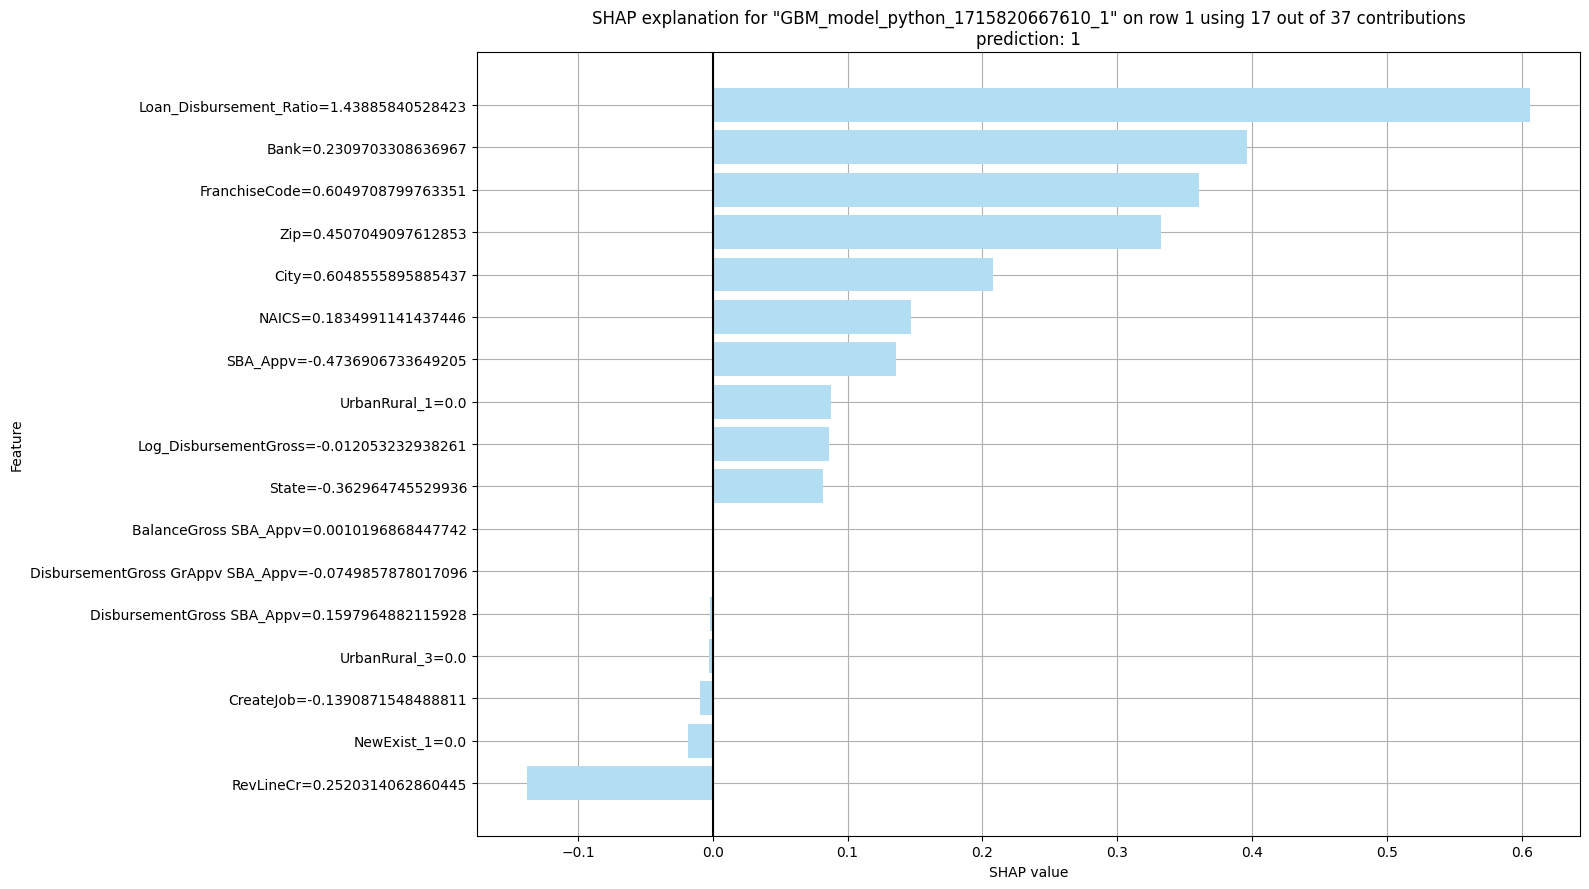

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [87]:
row_index = 1
gbm_model.explain_row(label_1_identified_correctly, row_index =row_index,include_explanations='shap_explain_row')

###### The most influential feature on the response variable is Loan Disbursement Ratio , which has a positive impact followed by Bank with positive effect

##### Label 1 is identified as 0


In [88]:
label_1_identified_as_0 = output[(output['MIS_Status'] == 1 ) & (output['predicted_label'] == 0)].iloc[0:2,:-3]
label_1_identified_as_0 = h2o.H2OFrame(label_1_identified_as_0)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

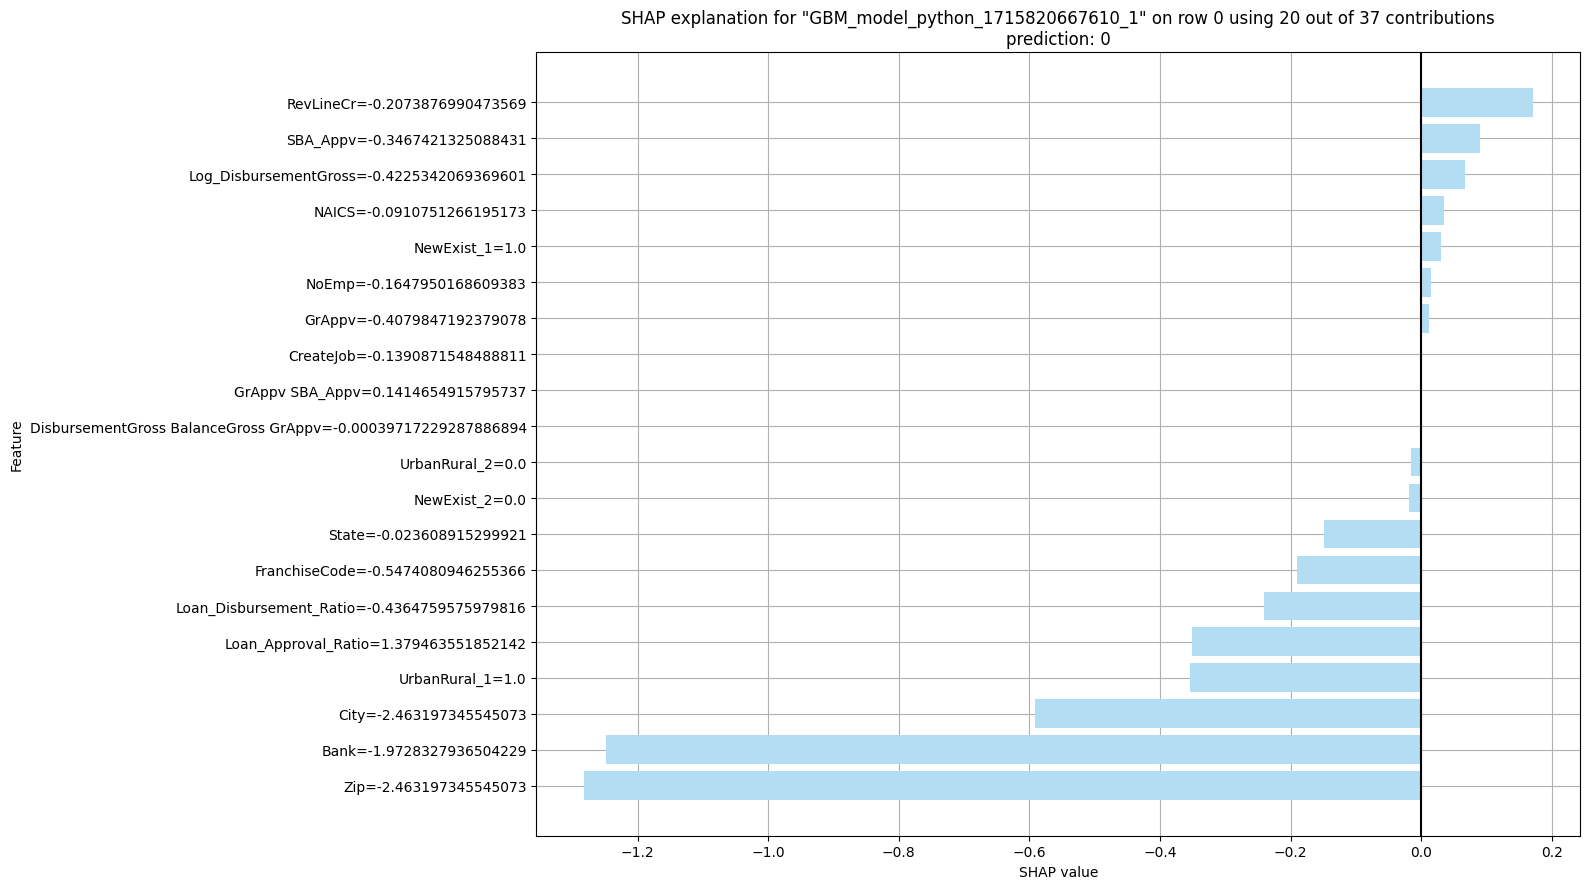

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [89]:
row_index = 0
gbm_model.explain_row(label_1_identified_as_0, row_index =row_index,include_explanations='shap_explain_row')

###### The most influential feature on the response variable is Bank , which has a negative impact followed by Zip with Negative effect

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

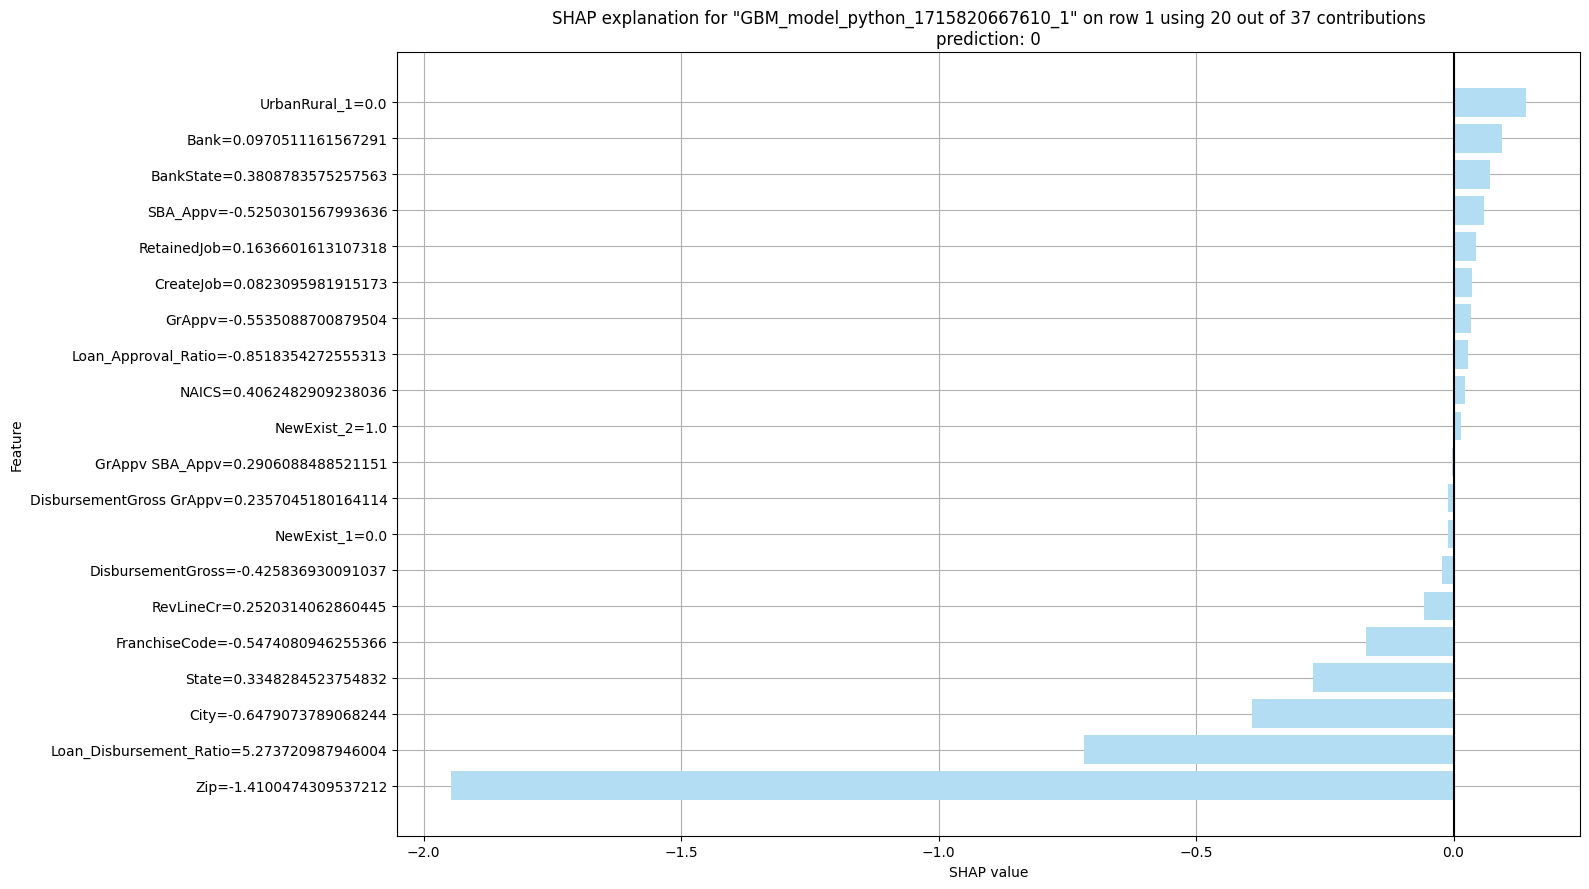

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [90]:
row_index = 1
gbm_model.explain_row(label_1_identified_as_0, row_index =row_index,include_explanations='shap_explain_row')

###### The most influential feature on the response variable is Zip , which has a negative impact followed by Loan Disbursement Ratio with Negative effect